In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/spam-or-not-spam-dataset/spam_or_not_spam.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r'../input/spam-or-not-spam-dataset/spam_or_not_spam.csv')
data.head()
from sklearn.utils import shuffle
data = shuffle(data)

In [4]:
data['label'].value_counts()


0    2500
1     500
Name: label, dtype: int64

In [5]:
text =[] 
  
# Iterate over each row 
for index, rows in data.iterrows(): 
    # Create list for the current row 
    my_list =str(rows.email)
      
    # append the list to the final list 
    text.append(my_list) 
  
# Print the list 
len(text)

3000

In [6]:
label=list(data['label'])

In [7]:
len(label)

3000

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

Using TensorFlow backend.


In [9]:
x_train=sequences[:2000]
y_train=label[:2000]
x_test=sequences[2000:]
y_test=label[2000:]

In [10]:
maxlen = 20
from keras import preprocessing
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [11]:
x_train[0]

array([  2,  51,  16,   2,  52, 369,  15, 276,  60,  19, 177, 943,   7,
         6,  65, 856,   3,  19,   6, 314], dtype=int32)

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [13]:
x_train[0]

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
y_train[0]

0

In [15]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [16]:
y_train[0]

0.0

In [17]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

* We’re creating a layer that will only accept as input 2D tensors where the first dimen-sion is 1000 (axis 0, the batch dimension, is unspecified, and thus any value would beaccepted). This layer will return a tensor where the first dimension has been trans-formed to be 16.
* Without an activation function like relu (also called a non-linearity), the Dense layerwould consist of two linear operations—a dot product and an addition:output = dot(W, input) + b. So the layer could only learn linear transformations (affine transformations) of theinput data: the hypothesis space of the layer would be the set of all possible lineartransformations of the input data into a 16-dimensional space. Such a hypothesisspace is too restricted and wouldn’t benefit from multiple layers of representations,because a deep stack of linear layers would still implement a linear operation: addingmore layers wouldn’t extend the hypothesis space.In order to get access to a much richer hypothesis space that would benefit fromdeep representations, you need a non-linearity, or activation function. relu is themost popular activation function in deep learning, but there are many other candi-dates, which all come with similarly strange names: prelu, elu, and so on.

In [18]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [19]:
history = model.fit(x_train,
y_train,
epochs=20,
batch_size=32,
validation_split=0.3)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 0s 298us/step - loss: 0.4822 - accuracy: 0.8307 - val_loss: 0.3477 - val_accuracy: 0.8333
Epoch 2/20
1400/1400 [==============================] - 0s 62us/step - loss: 0.2762 - accuracy: 0.8636 - val_loss: 0.2303 - val_accuracy: 0.9083
Epoch 3/20
1400/1400 [==============================] - 0s 63us/step - loss: 0.1809 - accuracy: 0.9293 - val_loss: 0.1645 - val_accuracy: 0.9433
Epoch 4/20
1400/1400 [==============================] - 0s 63us/step - loss: 0.1217 - accuracy: 0.9621 - val_loss: 0.1282 - val_accuracy: 0.9533
Epoch 5/20
1400/1400 [==============================] - 0s 63us/step - loss: 0.0846 - accuracy: 0.9786 - val_loss: 0.1038 - val_accuracy: 0.9567
Epoch 6/20
1400/1400 [==============================] - 0s 63us/step - loss: 0.0624 - accuracy: 0.9843 - val_loss: 0.0923 - val_accuracy: 0.9600
Epoch 7/20
1400/1400 [==============================] - 0s 64us/step - loss: 0.051

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

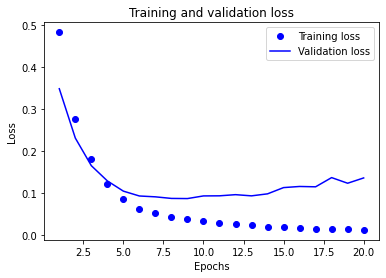

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

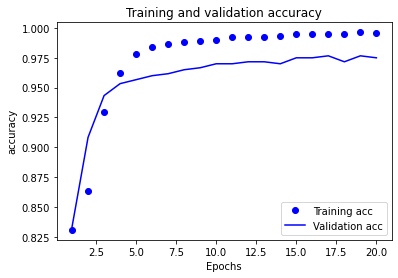

In [22]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
results = model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 26us/step


In [24]:
results

[0.1463444643151015, 0.9639999866485596]

In [25]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,),kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [27]:
history_reg1 = model.fit(x_train,
y_train,
epochs=20,
batch_size=32,
validation_split=0.3)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 0s 180us/step - loss: 0.6045 - accuracy: 0.8071 - val_loss: 0.4694 - val_accuracy: 0.8583
Epoch 2/20
1400/1400 [==============================] - 0s 66us/step - loss: 0.3605 - accuracy: 0.8914 - val_loss: 0.2676 - val_accuracy: 0.9333
Epoch 3/20
1400/1400 [==============================] - 0s 66us/step - loss: 0.2167 - accuracy: 0.9443 - val_loss: 0.1832 - val_accuracy: 0.9483
Epoch 4/20
1400/1400 [==============================] - 0s 67us/step - loss: 0.1525 - accuracy: 0.9621 - val_loss: 0.1452 - val_accuracy: 0.9567
Epoch 5/20
1400/1400 [==============================] - 0s 67us/step - loss: 0.1217 - accuracy: 0.9757 - val_loss: 0.1337 - val_accuracy: 0.9567
Epoch 6/20
1400/1400 [==============================] - 0s 66us/step - loss: 0.1058 - accuracy: 0.9793 - val_loss: 0.1260 - val_accuracy: 0.9567
Epoch 7/20
1400/1400 [==============================] - 0s 66us/step - loss: 0.095

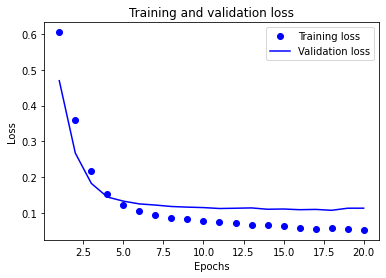

In [28]:
import matplotlib.pyplot as plt
history_dict = history_reg1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

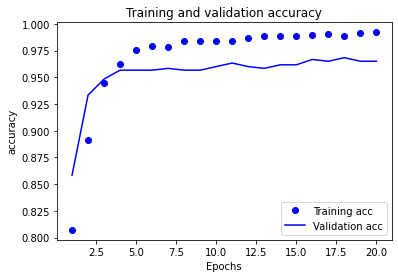

In [29]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
results1 = model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 26us/step


In [31]:
results1

[0.11185774141550064, 0.9649999737739563]

In [32]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [34]:
history_d = model.fit(x_train,
y_train,
epochs=20,
batch_size=32,
validation_split=0.3)

Train on 1400 samples, validate on 600 samples
Epoch 1/20
1400/1400 [==============================] - 0s 242us/step - loss: 0.5913 - accuracy: 0.7821 - val_loss: 0.5135 - val_accuracy: 0.8283
Epoch 2/20
1400/1400 [==============================] - 0s 71us/step - loss: 0.4476 - accuracy: 0.8336 - val_loss: 0.3818 - val_accuracy: 0.8283
Epoch 3/20
1400/1400 [==============================] - 0s 72us/step - loss: 0.3869 - accuracy: 0.8350 - val_loss: 0.3111 - val_accuracy: 0.8283
Epoch 4/20
1400/1400 [==============================] - 0s 71us/step - loss: 0.3361 - accuracy: 0.8343 - val_loss: 0.2673 - val_accuracy: 0.8283
Epoch 5/20
1400/1400 [==============================] - 0s 71us/step - loss: 0.3095 - accuracy: 0.8436 - val_loss: 0.2370 - val_accuracy: 0.8283
Epoch 6/20
1400/1400 [==============================] - 0s 72us/step - loss: 0.2629 - accuracy: 0.8571 - val_loss: 0.2133 - val_accuracy: 0.8917
Epoch 7/20
1400/1400 [==============================] - 0s 72us/step - loss: 0.237

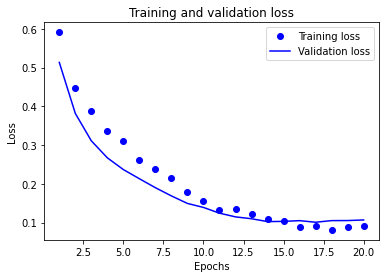

In [35]:
import matplotlib.pyplot as plt
history_dict = history_d.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

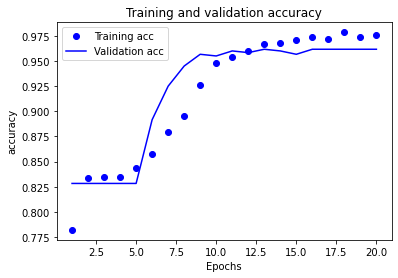

In [36]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [37]:
results2 = model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 28us/step


In [38]:
results

[0.1463444643151015, 0.9639999866485596]

In [39]:
results1

[0.11185774141550064, 0.9649999737739563]

In [40]:
results2

[0.11950493179261684, 0.9639999866485596]